In [4]:
import datetime
import pytz

def datetimeFromUnix(unix_timestamp):
    myTime = datetime.datetime.fromtimestamp(unix_timestamp/1000)

    eastern_tz = pytz.timezone('US/Eastern')
    localTime = datetime.datetime.fromtimestamp(unix_timestamp/1000, eastern_tz)
    return(myTime, localTime)

times = datetimeFromUnix(1615817400000)
print(times[0])
print(times[1])

#1615815000000
#1699041540000

2021-03-15 15:10:00
2021-03-15 11:10:00-04:00


In [6]:
milliseconds = 1615821000000 - 1615817400000 
seconds, milliseconds = divmod(milliseconds, 1000)
minutes, seconds = divmod(seconds, 60)
hours, minutes = divmod(minutes, 60)
days, hours = divmod(hours, 24)

print("Days:", days)
print("Hours:", hours)


Days: 0
Hours: 1


In [19]:
def unixFromDatetime(date_string):
    # Convert date string to datetime object
    date_obj = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    
    # Convert datetime object to Unix timestamp
    unix_timestamp = int(date_obj.timestamp())
    
    return unix_timestamp

# Example usage
date_string = "2022-01-01"
unixFromDatetime(date_string)

1640995200

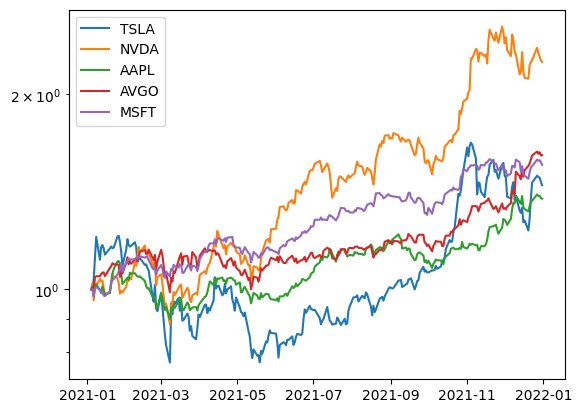

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt

def getStockChange(ticker, start, end=0):
    stock = yf.Ticker(ticker)
    if end == 0:
        hist = stock.history(start=start)
    else:
        hist = stock.history(start=start, end=end)
    start_price = hist["Close"][0]
    hist["Change"] = hist["Close"] / start_price
    plt.plot(hist.index, hist["Change"], label=ticker)

start_date = "2021-01-01"
end_date = "2022-01-01"

getStockChange("TSLA", start_date, end_date)
getStockChange("NVDA", start_date, end_date)
getStockChange("AAPL", start_date, end_date)
getStockChange("AVGO", start_date, end_date)
getStockChange("MSFT", start_date, end_date)
plt.yscale("log")
plt.legend()